In [15]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){ $('div.input').hide();} else { $('div.input').show();}
 code_show = !code_show
} $( document ).ready(code_toggle);
</script> Códigos "fonte" escondidos, para mostrá-los clique <a href="javascript:code_toggle()">aqui</a>.''')

## Setup Inicial e Leitura dos [Dados](https://archive.ics.uci.edu/ml/datasets/bank+marketing#)

In [2]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
sns.set_style("darkgrid")
%matplotlib inline

In [3]:
# functions

def plot_duo(target_col, df):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    # absolutes
    ind = df.loc[df['y']=='yes',target_col].value_counts().index
    sns.countplot(x=target_col, hue='y', order=ind, data=df, ax=ax1)
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=30)
    # relatives
    target_totals = df[target_col].value_counts()
    target_yes = df.loc[df['y']=='yes',target_col].value_counts()
    target_df = pd.DataFrame({'totals':target_totals, 'yes':target_yes})
    target_df['perc'] = target_df.apply(lambda x: x['yes']/x['totals'], axis=1)
    target_df[target_col] = target_df.index
    target_df.sort_values('perc', ascending=False, inplace=True)
    sns.barplot(x=target_col, y='perc', data=target_df, palette="Blues_d", ax=ax2)
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30)
    # plot
    plt.show()


In [4]:
# reading data
data = pd.read_csv('../data/bank.csv', sep=';', index_col=False)
data_full = pd.read_csv('../data/bank-full.csv', sep=';', index_col=False)
data['date'] = data.apply(lambda x: datetime.strptime('{} {}'.format(str(x['month']),str(x['day'])), '%b %d').strftime('%m-%d'), axis=1)
# data_full['date'] = data_full.apply(lambda x: datetime.strptime('{} {}'.format(str(x['month']),str(x['day'])), '%b %d').strftime('%m-%d'), axis=1)
data_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 1. Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?

Estudantes são os que possuem maior tendência a fazer um empréstimo, com uma taxa maior que o dobro da média (11%), aposentados estão logo em seguida. Vale ressaltar que ambas profissões são de baixo volume na base, não se sabe se existe um limite deste público ou se esta taxa se manteria constante para volumes maiores.

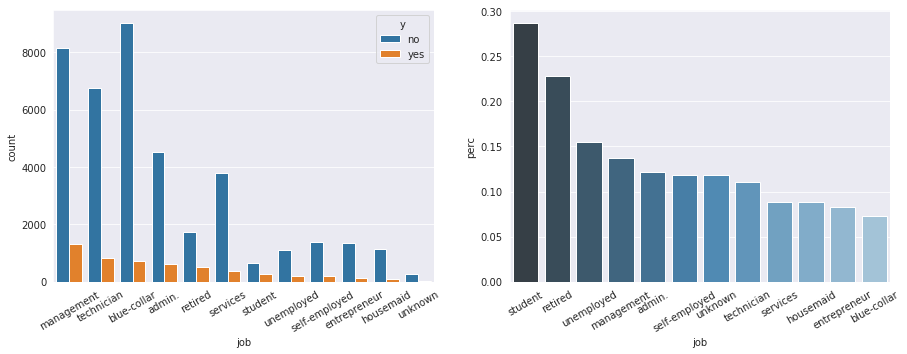

In [5]:
plot_duo(target_col='job', df=data_full)

O primeiro gráfico mostra em absoluto a quantidade de observações para cada profissão separado por resposta à campanha e ordenado por quantidade com resposta positiva. Vemos que gestão e técnicos são os que mais representam aceitações em volume na base.

O segundo gráfico mostra informações relativas, representando a "aceitação" de cada profissão. Vemos que estudantes e aposentados são os que tem maior taxa de sucesso.

## 2. Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?

A primeira impressão é de que quanto mais contatos, menor a chance de sucesso, isto acontece até aproximadamente 17 contatos, após isto a chance começa a crescer com a quantidade de contatos, até aproximadamente 34 contatos, em que a chance zera e nunca mais aumenta.


O primeiro questionamento seria o porque a chance começa a aumentar após 17. Por último temos o porquê vemos esta chance zerar após 34.

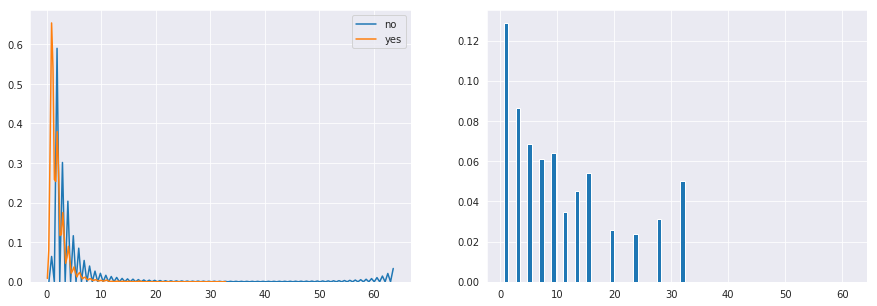

In [7]:
hist_n, bin_edges_n = np.histogram(data_full.loc[data_full['y'] == 'no','campaign'].values, density=False, bins=30)
hist_y, bin_edges_y = np.histogram(data_full.loc[data_full['y'] == 'yes','campaign'].values, density=False, bins=bin_edges_n)
hist_perc = [x/y if y!=0 else 0 for x,y in zip(hist_y,(hist_y + hist_n))]
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.kdeplot(data_full.loc[data_full['y'] == 'no','campaign'].values, label='no', ax=ax1)
sns.kdeplot(data_full.loc[data_full['y'] == 'yes','campaign'].values, label='yes', ax=ax1)
ax2.bar(bin_edges_y[:-1], hist_perc)
plt.show()

O primeiro gráfico mostra a distribuição das observações de acordo com o número de contatos e separada por resposta (positiva ou não).Vemos maior volume da resposta positiva em números menores de contato, e que a partir de certo número (aproximadamente 34), não temos mais casos positivos de campanha. Também podemos observar que a base possui pouquíssimos casos que passaram de 10 contatos.


O segundo gráfico mostra a taxa de aceitação por número de contatos. Ela decresce até 20 contatos, quando sobe até passar dos 30 e a partir disto é zerada para o restante dos casos.

## 3. Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?

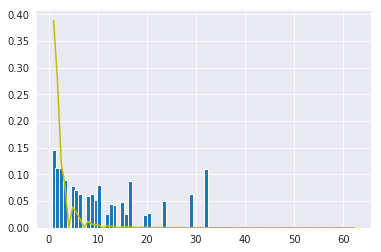

In [8]:
hist_n, bin_edges_n = np.histogram(data_full.loc[data_full['y'] == 'no','campaign'].values, density=False, bins=80)
hist_y, bin_edges_y = np.histogram(data_full.loc[data_full['y'] == 'yes','campaign'].values, density=False, bins=bin_edges_n)
hist_count, bin_edges_y = np.histogram(data_full['campaign'].values, density=False, bins=bin_edges_n)
hist_perc = np.array([x/y if y!=0 else 0 for x,y in zip(hist_y,(hist_y + hist_n))])
hist_counts = hist_count / data_full.shape[0]
plt.bar(bin_edges_y[:-1], hist_perc)
plt.plot(bin_edges_y[:-1], hist_counts, color='y')
plt.show()

Em azul vemos a taxa de sucesso por quantidade de contatos, e a linha amarela representa a representatividade destas campanhas na base.

Apesar de termos algumas faixas com taxa de sucesso relativamente boa após 10 contatos, estes não representam proporção da base para serem considerados.

In [9]:
bins_bons = bin_edges_y[:-1][tuple([hist_perc > 0.11] and [hist_counts > 0.05])]
num_medio = (max(bins_bons) - min(bins_bons)) / 2
print(num_medio, max(bins_bons))

1.1625 3.325


Em geral o recomendado seria uma média de um ou dois contatos, e no máximo 3.


Isto pode variar para cada perfil de pessoa, apliquei algumas clusterizações mas não obtive sucesso em isolar algum tipo de perfil que seja mais suscetível à um grande número de contatos. Acredito que se deva ao tamanho da amostra, temos um número muito pequeno de observações com mais contatos.

## 4. O resultado da campanha anterior tem relevância na campanha atual?

Definitivamente sim, os casos em que a campanha anterior teve sucesso possuíram  uma taxa maior que 50%. Vale ressaltar que a amostra destes casos é pequena comparado aos status "desconhecido".

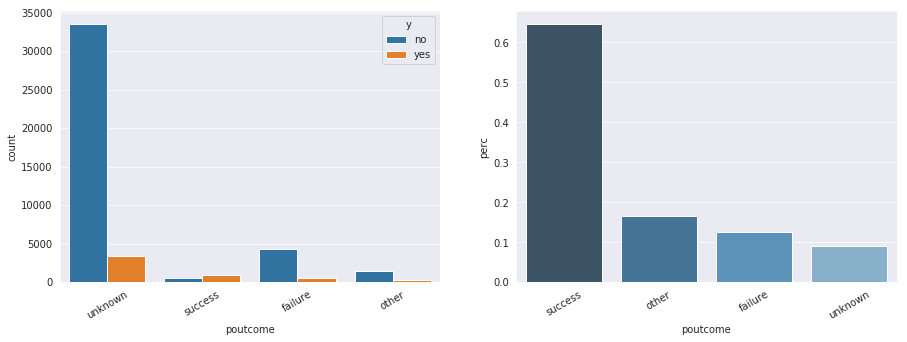

In [10]:
plot_duo(target_col='poutcome', df=data_full)

## 5. Qual o fator determinante para que o banco exija um seguro de crédito?

Pelo que entendi, a variável que se refere ao "seguro de crédito" seria a "default", por ter a ver com a falha em realizar uma operação anteriormente. Fiz uma rápida análise de qual variável seria a mais importante na classificação do não pagamento anterior, e a que mais ajuda a determinar é o saldo médio em conta.

In [12]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
dfx = data_full[[x for x in data_full if x not in ('day','month','duration','y')]].copy()
col_binary = ['default','housing','loan']
for col in col_binary:
    dfx[col] = dfx[col].map({'no':0,'yes':1})
categorical_columns = ['job','marital','education','contact','poutcome']
encoding_dict = dict()
for enc_col in categorical_columns:
    encoding_dict[enc_col] = preprocessing.LabelEncoder()
    encoding_dict[enc_col].fit(list(set(dfx[enc_col].values)))
    dfx[enc_col] = encoding_dict[enc_col].transform(dfx[enc_col])

clf = DecisionTreeClassifier(max_depth=3).fit(X=dfx[[x for x in dfx.columns if x != 'default']].values, y=dfx['default'].values)
col_importances = dict(zip([x for x in dfx.columns if x != 'default'],clf.feature_importances_))
sorted(col_importances.items(), key=lambda kv: kv[1], reverse=True)[:3]

[('balance', 0.9167171878007773),
 ('age', 0.05179481621309081),
 ('loan', 0.03148799598613194)]

## 6. Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?

Comparado aos que não tem, eles são mais jovens, tem maior representatividade na indústria ("blue-collar"), com ensino médio, e em geral foram mais contatados por campanhas anteriores.

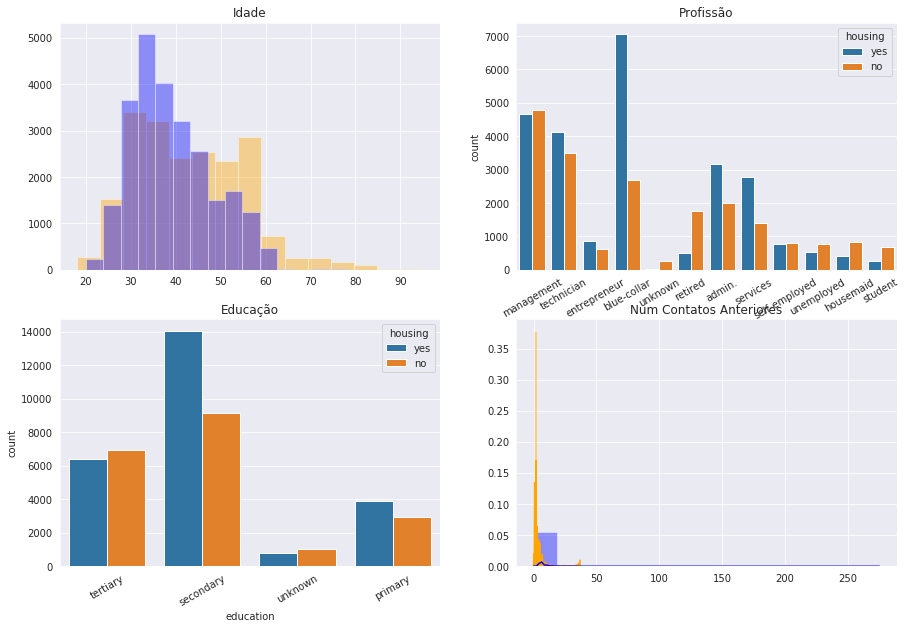

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.distplot(data_full.loc[data_full['housing'] == 'no','age'].values, label='no', bins=15, color='orange', kde=False, ax=ax1)
sns.distplot(data_full.loc[data_full['housing'] == 'yes','age'].values, label='yes', bins=15, color='blue', kde=False, ax=ax1)
ax1.set_title('Idade')

sns.countplot(x='job', hue='housing', data=data_full, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30)
ax2.set_title('Profissão')

sns.countplot(x='education', hue='housing', data=data_full, ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=30)
ax3.set_title('Educação')

sns.distplot(data_full.loc[data_full['housing'] == 'no','previous'].values, label='no', bins=15, color='orange', ax=ax4)
sns.distplot(data_full.loc[data_full['housing'] == 'yes','previous'].values, label='yes', bins=15, color='blue', ax=ax4)
ax4.set_title('Num Contatos Anteriores')

plt.show()